In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_to_MF/smiles_list_all.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,Cn1cccc1-c1cccc2c1Nc1ccccc1O2,e=1-0.1
1,CN(Cc1ccc(P(=O)(c2ccccc2)c2cc(-c3ccc4ncoc4c3)c...,e=1-0.1
2,CC1(C)c2ccccc2Nc2c(-c3ccc(C(=C4C(=O)c5ccccc5C4...,e=1-0.1
3,N#Cc1cc(C#N)c(-c2ncsc2C#Cc2c(F)c(F)cc(F)c2F)c(...,e=1-0.1
4,C#CC1NC(C(=C)c2cc(C#N)c(C#N)c(C#N)c2)COC1n1c2c...,e=1-0.1
...,...,...
101239,COC(C=C1)=CC=C1C2=CC(C3=CC=C(C=C3)OC)=CC(C4=CC...,real
101240,C[N+]1=C(C=CC=C2)C2=CC3=CC=CC=C31,real
101241,C[N+]1=C(C=CC=C2)C2=C(C3=CC=CC=C3)C4=CC=CC=C41,real
101242,C[N+]1=C(C=CC=C2)C2=C(C3=C(C=C(C=C3C)C)C)C4=CC...,real


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df

(101244, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,9.979777,8.773305
1,-3.699013,10.122215
2,-2.238357,9.793508
3,10.176822,5.641095
4,9.238160,3.589869
...,...,...
101239,12.213618,12.337722
101240,11.600151,11.571362
101241,11.599554,11.726613
101242,11.621132,11.751421


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,9.979777,8.773305,e=1-0.1
1,-3.699013,10.122215,e=1-0.1
2,-2.238357,9.793508,e=1-0.1
3,10.176822,5.641095,e=1-0.1
4,9.238160,3.589869,e=1-0.1


In [6]:
MF_umap_human = df_umap[df_umap['made_by'] == 'human']
MF_umap_e1_01 = df_umap[df_umap['made_by'] == 'e=1-0.1']
MF_umap_e1 = df_umap[df_umap['made_by'] == 'e=1']
MF_umap_e01 = df_umap[df_umap['made_by'] == 'e=0.1']
MF_umap_real = df_umap[df_umap['made_by'] == 'real']

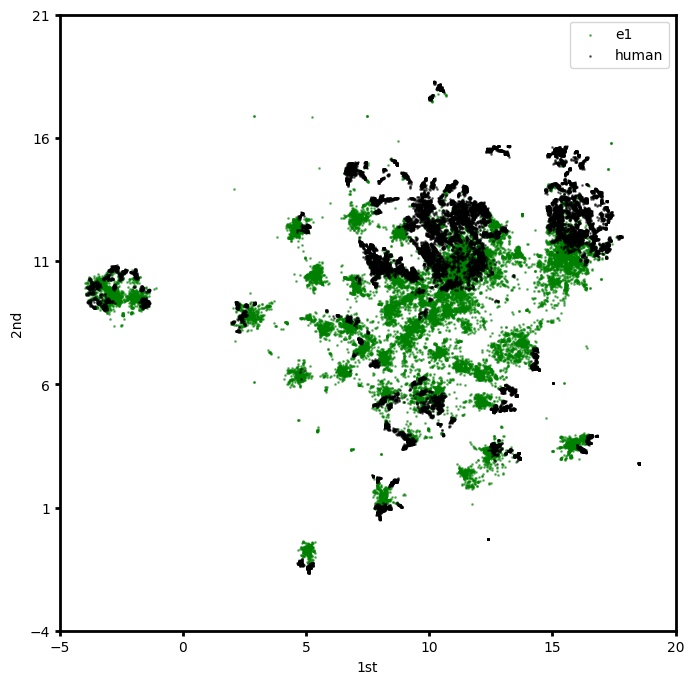

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-4, 21)
plt.yticks(np.arange(-4, 22, 5))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend()
plt.show()

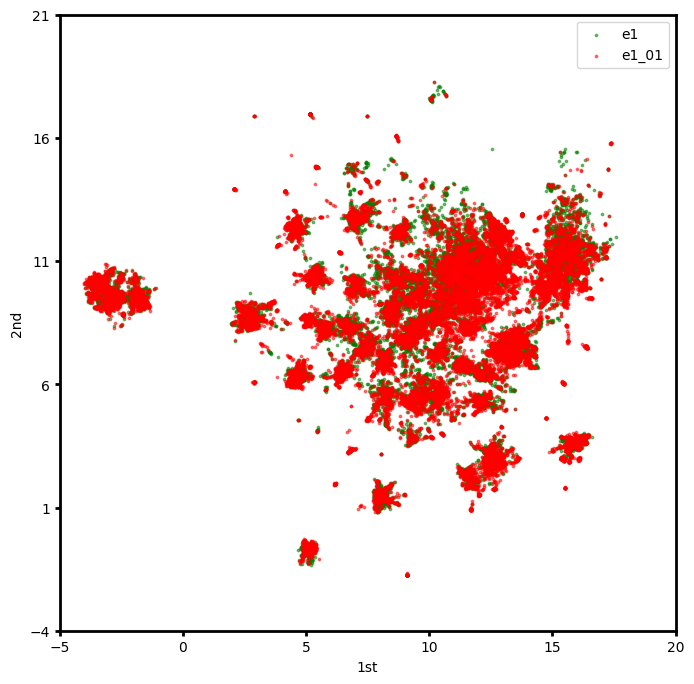

In [8]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_e1_01['UMAP_0'], MF_umap_e1_01['UMAP_1'], color='red', label='e1_01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-4, 21)
plt.yticks(np.arange(-4, 22, 5))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend()
plt.show()

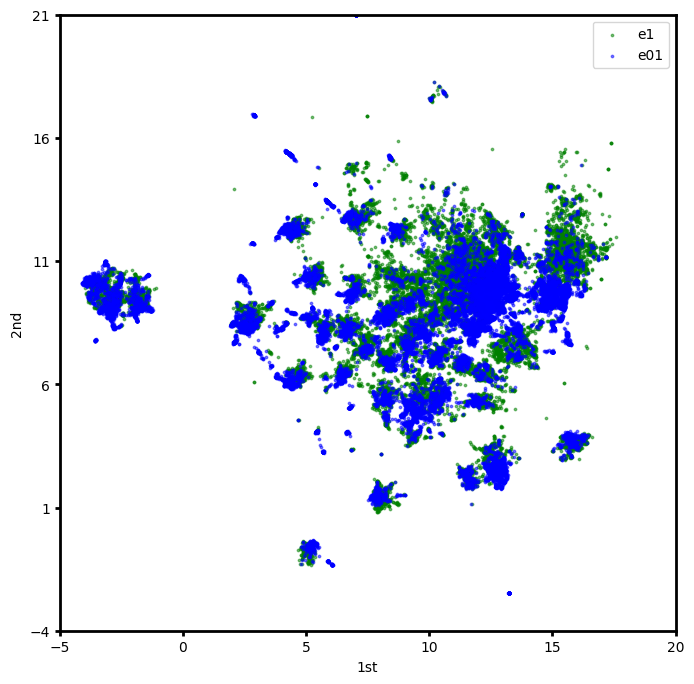

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-4, 21)
plt.yticks(np.arange(-4, 22, 5))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend()
plt.show()

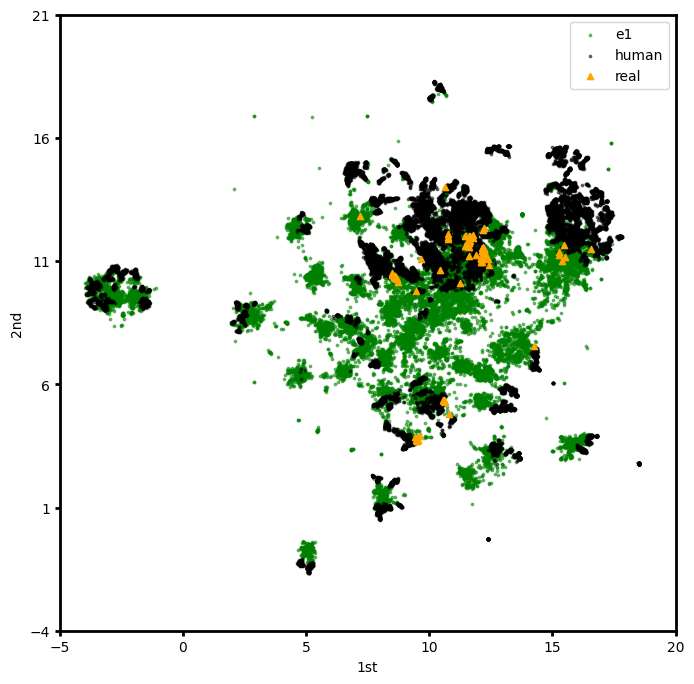

In [10]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=3, alpha=0.5)
plt.scatter(MF_umap_real['UMAP_0'], MF_umap_real['UMAP_1'], color='orange', label='real', marker='^', s=20)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-5, 20)
plt.ylim(-4, 21)
plt.yticks(np.arange(-4, 22, 5))
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()